<h4>IMAGE CLASSIFICATION MODEL</h4>

<h4>Import necessary libraries</h4>

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<h4>Load dataset from kaggle: <a href="https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection">https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection</a></h4>

In [2]:
data_dir = "Dataset"
IMG_SIZE = (64,64)  
categories = os.listdir(data_dir)
categories

['mask_weared_incorrect', 'without_mask', 'with_mask']

In [3]:
X=[]
y=[]
for idx, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
    
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, IMG_SIZE)  # Resize to uniform size
        
        X.append(img)
        y.append(idx)  # Assign label (index of category)


In [4]:
len(X),len(y)

(8982, 8982)

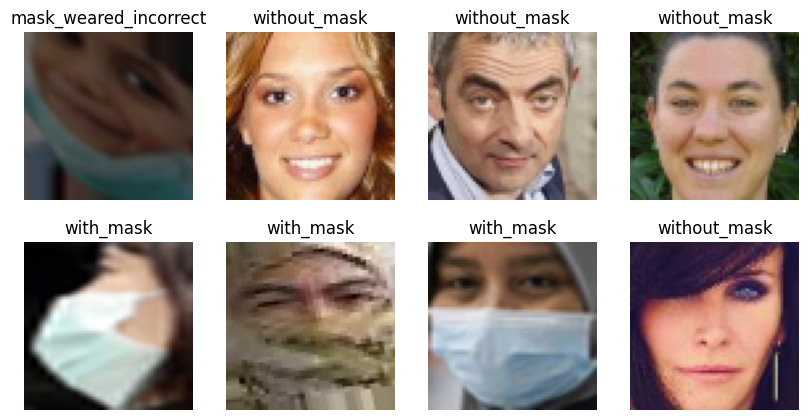

In [5]:
import random

plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    rand_num=random.randint(1,8983)
    plt.imshow(X[rand_num])
    plt.title(categories[y[rand_num]])
    plt.axis("off")
plt.show()

<h4>Splitting the data</h4>

In [6]:
from sklearn.model_selection import train_test_split
# Convert to NumPy arrays
X = np.array(X) / 255.0  # Normalize pixel values (0 to 1)
y = np.array(y)

# Split into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

<h4>Build CNN MODEL</h4>

In [7]:
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')  # Output layer
])
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

<h4>Train the Model</h4>

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
225/225 [==============================] - 67s 238ms/step - loss: 0.4577 - accuracy: 0.8054 - val_loss: 0.1871 - val_accuracy: 0.9366
Epoch 2/10
225/225 [==============================] - 52s 232ms/step - loss: 0.1914 - accuracy: 0.9326 - val_loss: 0.1310 - val_accuracy: 0.9533
Epoch 3/10
225/225 [==============================] - 51s 226ms/step - loss: 0.1289 - accuracy: 0.9556 - val_loss: 0.1115 - val_accuracy: 0.9588
Epoch 4/10
225/225 [==============================] - 51s 228ms/step - loss: 0.0888 - accuracy: 0.9724 - val_loss: 0.0933 - val_accuracy: 0.9622
Epoch 5/10
225/225 [==============================] - 51s 228ms/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0666 - val_accuracy: 0.9822
Epoch 6/10
225/225 [==============================] - 54s 240ms/step - loss: 0.0625 - accuracy: 0.9826 - val_loss: 0.0597 - val_accuracy: 0.9844
Epoch 7/10
225/225 [==============================] - 50s 220ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.0677 - val_ac

<h4>Accuracy and Loss Plots</h4>

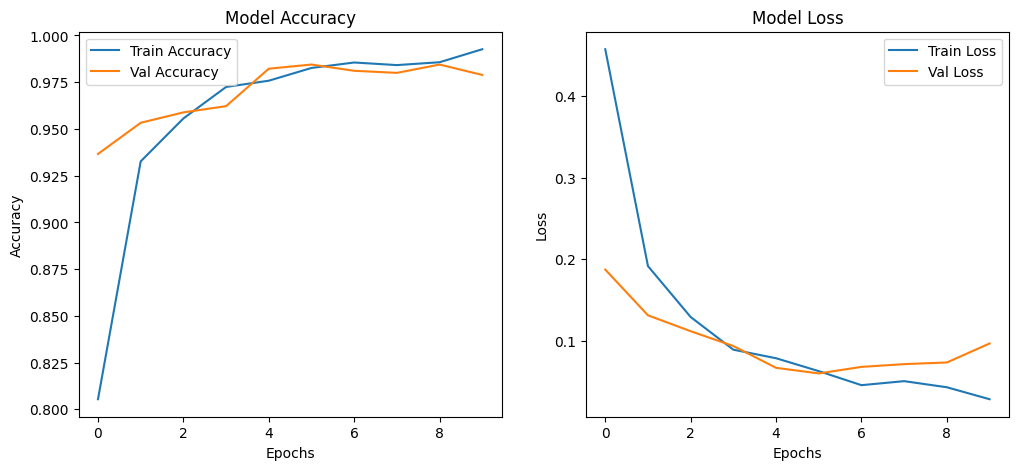

In [9]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<h4>Evaluate the Model</h4>

In [10]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

29/29 - 2s - loss: 0.0789 - accuracy: 0.9822 - 2s/epoch - 63ms/step
Test Accuracy: 0.9822
Test Loss: 0.0789


29/29 [==============================] - 2s 61ms/step


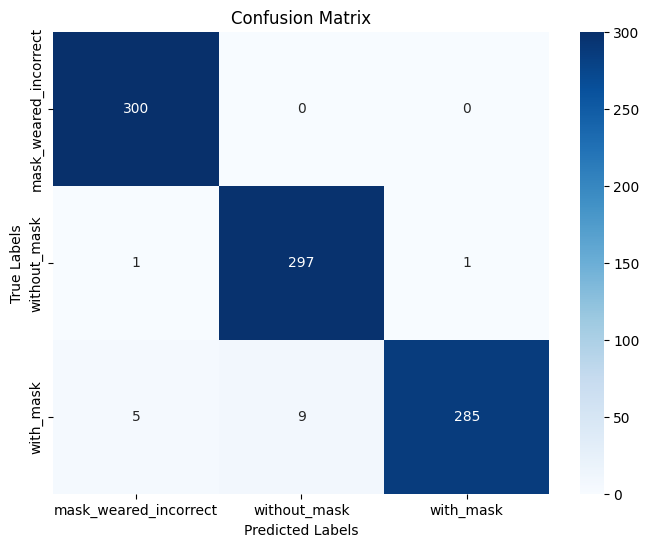

In [11]:
import seaborn as sns
# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Generate classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=categories))

Classification Report:

                       precision    recall  f1-score   support

mask_weared_incorrect       0.98      1.00      0.99       300
         without_mask       0.97      0.99      0.98       299
            with_mask       1.00      0.95      0.97       299

             accuracy                           0.98       898
            macro avg       0.98      0.98      0.98       898
         weighted avg       0.98      0.98      0.98       898



1/1 [==============================] - 0s 50ms/step


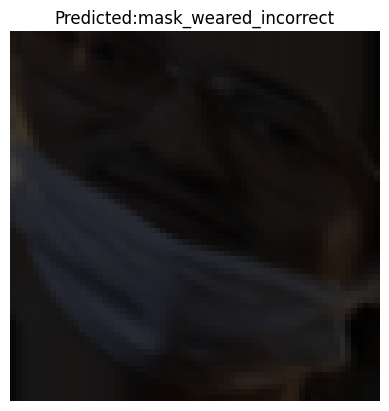

1/1 [==============================] - 0s 37ms/step


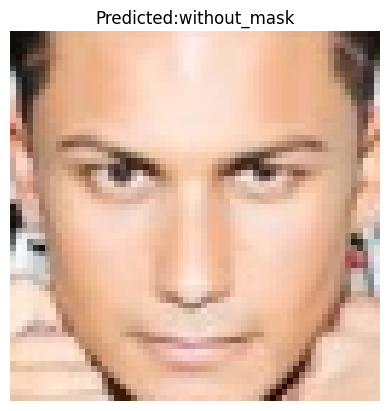

1/1 [==============================] - 0s 43ms/step


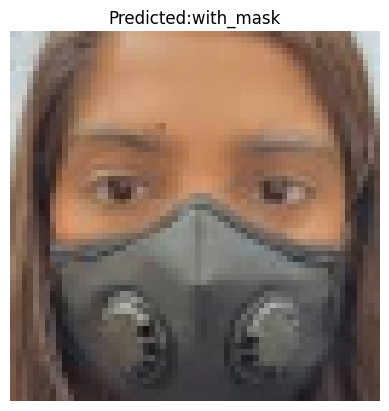

In [13]:
def predict_image(image_path):
    img=cv2.imread(image_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,IMG_SIZE)
    img_array=np.array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    predicted_class=categories[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted:{predicted_class}")
    plt.axis('off')
    plt.show()
rand_num=random.randint(1,3000)
predict_image(image_path=rf"Dataset/mask_weared_incorrect/{rand_num}.png")   
predict_image(image_path=rf"Dataset/without_mask/{rand_num}.png")  
predict_image(image_path=rf"Dataset/with_mask/{rand_num}.png") 
    

<h4>Conclusions</h4>
<h7>-The CNN model achieved a validation accuracy of 98% after 10 epochs, successfully distinguishing between three categories (mask, no mask, mask worn incorrectly).</h7><br>
<h7>-Rescaling pixel values to a range of 0 to 1 and resizing images to 64×64 improved consistency, while an 80-10-10 data split ( 10% validation,10% testing) ensured a balanced evaluation.</h7><br>
<h7>-Using three convolutional layers (32, 64, 128 filters) with 3×3 kernels and MaxPooling helped extract key features efficiently, leading to a low validation loss of 0.06 at the final epoch.</h7><br>
<h7>-The model correctly classifies most of the images still there are misclassifications.</h7>
